<a href="https://colab.research.google.com/github/Akshat5129/Artificial-Intelligence/blob/main/Practical_Test_AU19B1023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Test: Artificial Intelligence (EL2)
# Akshat Patel (AU19B1023)
##### Q2. Read .CSV file for the dataset of your choice.  Now count the total no of records , each attribute's unique values count and average and standard deviation of each column.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing,model_selection

In [4]:
data=pd.read_csv('winequality.csv')

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
X=data.drop('quality',axis=1)

In [9]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
Y=data['quality']

In [12]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [15]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [16]:
import tensorflow as tf

In [17]:
from tensorflow import keras

In [22]:
from tensorflow.keras import layers,callbacks

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
Early_Stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True,)

In [33]:
model=keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),])

In [34]:
model.compile(optimizer='adam',loss='mae')

In [35]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=256,epochs=500,callbacks=[Early_Stopping],verbose=0)

In [36]:
history_df=pd.DataFrame(history.history)

In [37]:
print(type(history_df))

<class 'pandas.core.frame.DataFrame'>


In [38]:
history_df.describe()

,loss,val_loss
count,99.000000,99.000000
mean,0.686334,1.365843
std,0.309610,1.444269
min,0.550131,0.521724
25%,0.593553,0.677579
50%,0.634428,0.838021
75%,0.678790,1.296311
max,3.519752,11.908835


In [39]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [40]:
history_df['loss'].min()

0.5501313805580139

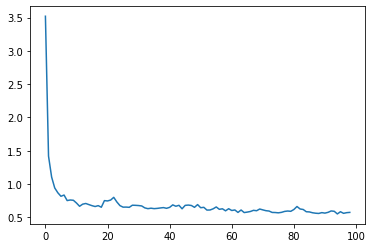

In [41]:
history_df.loc[:,'loss'].plot()

In [42]:
y_test.describe()

count    320.000000
mean       5.596875
std        0.809421
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

In [44]:
y_test.max()

8

In [45]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [46]:
y_test

1059    7
50      5
1183    5
607     6
404     5
       ..
1499    6
598     6
752     5
796     5
457     5
Name: quality, Length: 320, dtype: int64

In [47]:
data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [50]:
accuracy=model.evaluate(X,Y)

50/50 [==============================] - 0s 5ms/step - loss: 0.5292


In [51]:
print(accuracy*100)

52.923959493637085


In [52]:
predictions=model.predict(X)

In [53]:
predictions[0:5]

array([[5.0451083],
       [5.1439466],
       [5.0506783],
       [5.2518525],
       [5.0451083]], dtype=float32)

In [54]:
data['quality'].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64